初始长度：$44.2cm$，初始重量：$79.24g$，最终长度$49.2cm$

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
dataO = pd.read_csv('data.csv')
data=pd.DataFrame()
data['time'] = dataO['min']*60+dataO['sec']-5
data['force'] = (79.24-dataO['mass'])*9.8*(1E-3)
def linePlot(data):
    fig, ax = plt.subplots()
    ax.scatter(data['time'],data['force'])
    ax.plot(data['time'],data['force'],linestyle='--')
epsilon = (49.2-44.2)/44.2

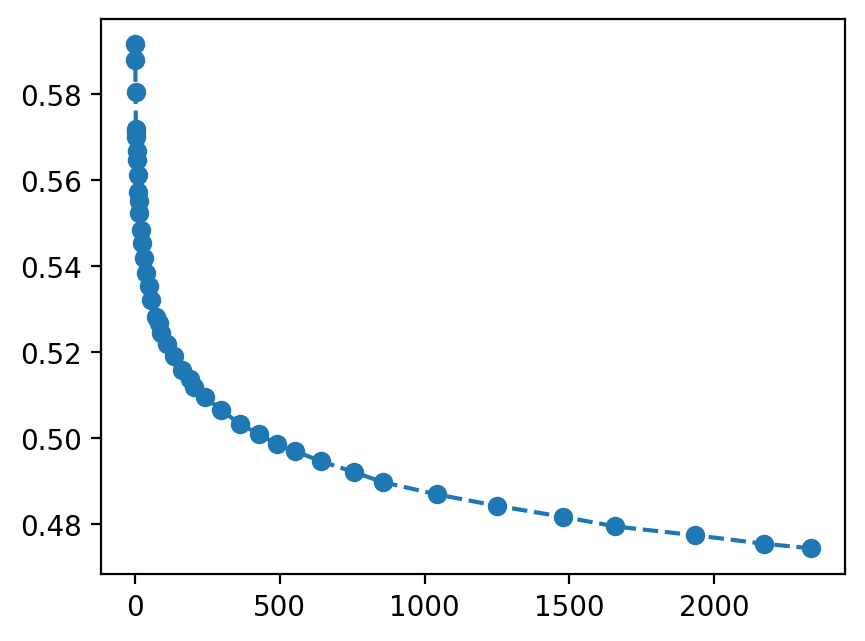

In [3]:
siep = data['force'] / (np.pi*np.square(0.5*(1E-3)/2)) / epsilon
depsiDt = np.zeros(data.shape[0]-1)
for i in range(0,depsiDt.shape[0]):
    depsiDt[i] = (siep.iloc[i+1] - siep.iloc[i])/(data['time'].iloc[i+1] - data['time'].iloc[i])
y = np.log(np.abs(depsiDt))
datap = pd.DataFrame()
datap['force'] = y
datap['time'] = data['time'].iloc[1:]

linePlot(data)

In [4]:
data1 = data[data['time'] > 500]
siep = data1['force'] / (np.pi*np.square(0.5*(1E-3)/2)) / epsilon
depsiDt = np.zeros(data1.shape[0]-1)
for i in range(0,depsiDt.shape[0]):
    depsiDt[i] = (siep.iloc[i+1] - siep.iloc[i])/(data1['time'].iloc[i+1] - data1['time'].iloc[i])
y = np.log(-depsiDt)
p1 = np.polyfit(data1['time'].iloc[1:],y,1)
tau1 = -1/p1[0]
E1=np.exp(p1[1])*tau1
print(tau1,E1)
e0arr = siep - E1*np.exp(-data1['time']/tau1)
E0 = np.average(e0arr)
print(E0)

1271.8555435480935 2280297.0518947556
20939929.965822637


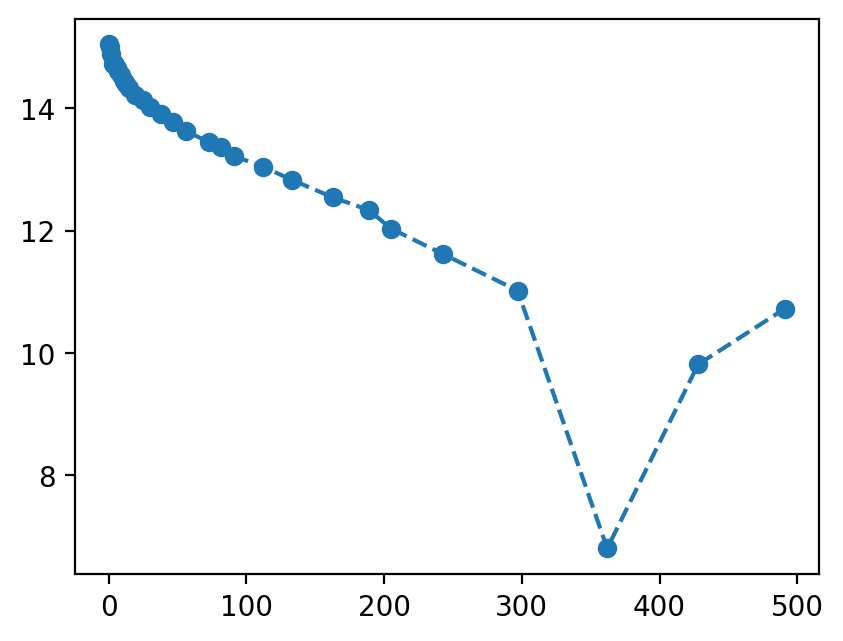

In [5]:
siep = data[data['time'] <= 500]['force'] / (np.pi*np.square(0.5*(1E-3)/2)) / epsilon
y = np.log(np.abs(siep - (E0 + E1*np.exp(-data[data['time'] <= 500]['time']/tau1))))
datap1 = pd.DataFrame()
datap1['force'] = y
datap1['time'] = data[data['time'] <= 500]['time']
linePlot(datap1)

In [6]:
data2 = data[(data['time']>100) & (data['time'] <= 500)]
siep = data2['force'] / (np.pi*np.square(0.5*(1E-3)/2)) / epsilon
y = np.log(np.abs(siep - (E0 + E1*np.exp(-data2['time']/tau1))))
p2 = np.polyfit(data2['time'],y,1)
tau2 = -1/p2[0]
E2 = np.exp(p2[1])
print(tau2,E2)

96.62246628391499 1190803.0460841318


In [7]:
data3 = data[data['time']<100]
siep = data3['force'] / (np.pi*np.square(0.5*(1E-3)/2)) / epsilon
y = np.log(np.abs(siep - (E0 + E1*np.exp(-data3['time']/tau1)+E2*np.exp(-data3['time']/tau2))))
p3 = np.polyfit(data3['time'],y,1)
tau3 = -1/p2[0]
E3 = np.exp(p2[1])
print(tau3,E3)

96.62246628391499 1190803.0460841318


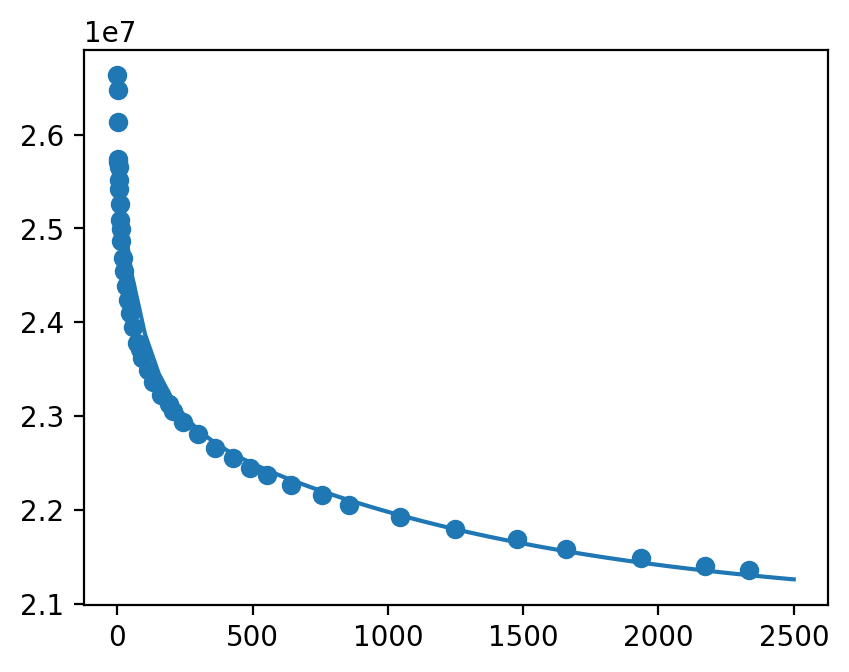

In [9]:
time = np.linspace(0,2500)
datapre = E0 + E1*np.exp(-time/tau1)+E2*np.exp(-time/tau2) + E3*np.exp(-time/tau3)
fig1, ax = plt.subplots()
siep = data['force'] / (np.pi*np.square(0.5*(1E-3)/2)) / epsilon
ax.scatter(data['time'], siep)
ax.plot(time, datapre)

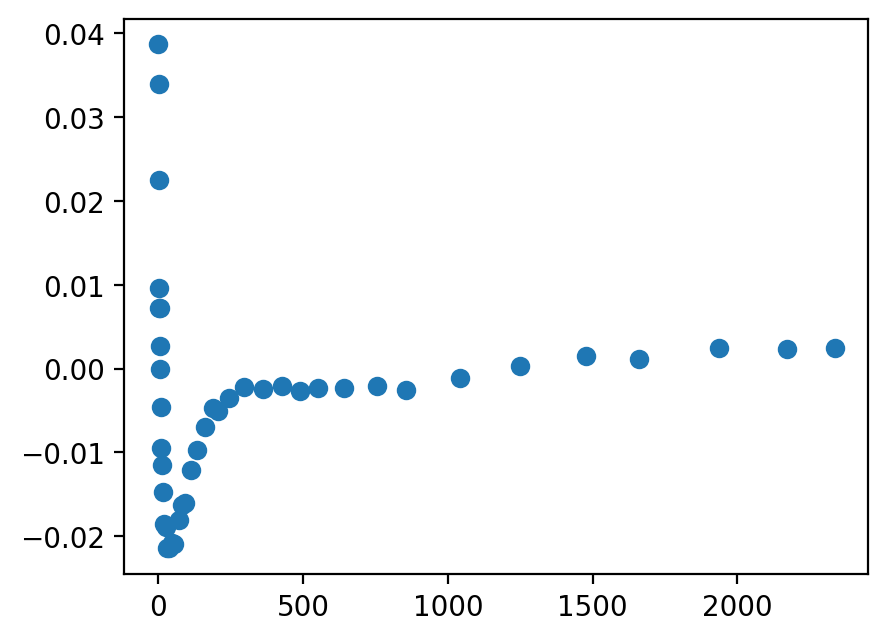

In [11]:
err = (siep - (E0 + E1*np.exp(-data['time']/tau1)+E2*np.exp(-data['time']/tau2) + E3*np.exp(-data['time']/tau3))) / siep
fig2,ax = plt.subplots()
ax.scatter(data['time'],err)